# Import packages

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# Import data into dataframe

In [2]:
data = pd.read_csv('thanksgiving.csv', encoding="Latin-1")
data.head()
data.shape

(1058, 65)

# Inspect dataframe columns

In [3]:
data.columns

Index(['RespondentID', 'Do you celebrate Thanksgiving?',
       'What is typically the main dish at your Thanksgiving dinner?',
       'What is typically the main dish at your Thanksgiving dinner? - Other (please specify)',
       'How is the main dish typically cooked?',
       'How is the main dish typically cooked? - Other (please specify)',
       'What kind of stuffing/dressing do you typically have?',
       'What kind of stuffing/dressing do you typically have? - Other (please specify)',
       'What type of cranberry saucedo you typically have?',
       'What type of cranberry saucedo you typically have? - Other (please specify)',
       'Do you typically have gravy?',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots',
       'Which of these side dishes aretypically served

# How many respondents celebrate thanksgiving

In [4]:
data['Do you celebrate Thanksgiving?'].value_counts()

Yes    980
No      78
Name: Do you celebrate Thanksgiving?, dtype: int64

# Drop rows of respondents who don't celebrate thanksgiving

In [5]:
data_yes = data[data['Do you celebrate Thanksgiving?']=='Yes']
data_yes['Do you celebrate Thanksgiving?'].value_counts()

Yes    980
Name: Do you celebrate Thanksgiving?, dtype: int64

# Inspect distribution of typical dishes

In [6]:
data_yes['What is typically the main dish at your Thanksgiving dinner?'].value_counts()

Turkey                    859
Other (please specify)     35
Ham/Pork                   29
Tofurkey                   20
Chicken                    12
Roast beef                 11
I don't know                5
Turducken                   3
Name: What is typically the main dish at your Thanksgiving dinner?, dtype: int64

# Display rows for families that have tofurkey

In [7]:
gravy = 'Do you typically have gravy?'
Tof = data_yes['What is typically the main dish at your Thanksgiving dinner?'] == 'Tofurkey'
data_yes[gravy][Tof]


4      Yes
33     Yes
69      No
72      No
77     Yes
145    Yes
175    Yes
218     No
243    Yes
275     No
393    Yes
399    Yes
571    Yes
594    Yes
628     No
774     No
820     No
837    Yes
860     No
953    Yes
Name: Do you typically have gravy?, dtype: object

# analyze families that had pies

In [8]:
# simplify labels
Apple_Pie = 'Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple'
Pecan_Pie = 'Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan'
Pumpkin_Pie = 'Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin'
Pie_labels = [Apple_Pie, Pecan_Pie, Pumpkin_Pie]
# create boolean series for each pie column
Pie_Bools = [pd.isnull(data_yes[pie]) for pie in Pie_labels]
# create counts of different pies consumed
had_pie = sum(Pie_Bools)
# create boolean for having at least one type of pie
ate_pies = Pie_Bools[0] & Pie_Bools[1] & Pie_Bools[2]
data_yes['ate_pies'] = ate_pies
data_yes.ix[:,'ate_pies'].value_counts()

/Users/javin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


False    876
True     104
Name: ate_pies, dtype: int64

# Create function to convert age from string to integer

In [9]:
def ageint(age):
    # split age value, grab first age, then replace '+' with blank space
    try:
        age_split = age.split(' ')
        age_no_plus = age_split[0].replace('+','')
        age_int = int(age_no_plus)

        return age_int
    
    # account for empty values
    except AttributeError:
        return

# Create int_age column with ageint function and inspect

In [10]:
data_yes['int_age'] = data_yes['Age'].apply(ageint)
data_yes['int_age'].describe()

/Users/javin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/javin/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    947.000000
mean      40.089757
std       15.352014
min       18.000000
25%             NaN
50%             NaN
75%             NaN
max       60.000000
Name: int_age, dtype: float64

# ageint findings
## These aren't the true ages of survey respondents. The values stem from grabbing the first age from each age interval.  Thus, they are ages on the lower end of each respondents age range. 

# Create function to convert income from string to integer

In [11]:
def earnings_int(earning):
    # split income value, grab lower income bound, then remove '$' and ',' 
    try:
        earning_lowend = earning.split(' ')[0]
        earning_clean = earning_lowend.replace('$','')
        earning_clean = earning_clean.replace(',','')
        earning_int = int(earning_clean)
        return earning_int
    
    # account for empty values
    except AttributeError:
        return 
    except ValueError:
        return 

# Apply function to create int_income column and inspect 

In [12]:
income_column = 'How much total combined money did all members of your HOUSEHOLD earn last year?'
data_yes['int_income'] = data_yes[income_column].apply(earnings_int)
data_yes['int_income'].describe()

/Users/javin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/javin/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count       829.000000
mean      75965.018094
std       59068.636748
min           0.000000
25%                NaN
50%                NaN
75%                NaN
max      200000.000000
Name: int_income, dtype: float64

# int_income findings
## Similar to ageint, these aren't the true incomes of survey respondents. The values stem from grabbing the first income value from each interval.  Thus, they are incomes on the lower end of each respondents age range. This undervalues the descriptive statistics in the above cell.

# Inspect travel distance of income groups

In [13]:
higher_income = data_yes['int_income'] > 150000
lower_income = data_yes['int_income'] < 150000

In [14]:
data_yes.ix[higher_income,'How far will you travel for Thanksgiving?'].value_counts()

Thanksgiving is happening at my home--I won't travel at all                         49
Thanksgiving is local--it will take place in the town I live in                     25
Thanksgiving is out of town but not too far--it's a drive of a few hours or less    16
Thanksgiving is out of town and far away--I have to drive several hours or fly      12
Name: How far will you travel for Thanksgiving?, dtype: int64

In [15]:
data_yes.ix[higher_income,'How far will you travel for Thanksgiving?'].value_counts(normalize=True)

Thanksgiving is happening at my home--I won't travel at all                         0.480392
Thanksgiving is local--it will take place in the town I live in                     0.245098
Thanksgiving is out of town but not too far--it's a drive of a few hours or less    0.156863
Thanksgiving is out of town and far away--I have to drive several hours or fly      0.117647
Name: How far will you travel for Thanksgiving?, dtype: float64

In [16]:
data_yes.ix[lower_income,'How far will you travel for Thanksgiving?'].value_counts()

Thanksgiving is happening at my home--I won't travel at all                         281
Thanksgiving is local--it will take place in the town I live in                     203
Thanksgiving is out of town but not too far--it's a drive of a few hours or less    150
Thanksgiving is out of town and far away--I have to drive several hours or fly       55
Name: How far will you travel for Thanksgiving?, dtype: int64

In [113]:
data_yes.ix[lower_income,'How far will you travel for Thanksgiving?'].value_counts(normalize=True)

Thanksgiving is happening at my home--I won't travel at all                         0.407837
Thanksgiving is local--it will take place in the town I live in                     0.294630
Thanksgiving is out of town but not too far--it's a drive of a few hours or less    0.217707
Thanksgiving is out of town and far away--I have to drive several hours or fly      0.079826
Name: How far will you travel for Thanksgiving?, dtype: float64

# Travel distance compared to income findings
## looking at value counts alone, the lower income group takes up a large majority of total respondents. With that in mind, I normalized the counts. When normalized, some similar trends followed for each "How for will you travel..." group. For example, A majority of respondents from both groups had thanksgiving at home, and wouldn't travel at all. 

## A slight difference emerged, in willingess to travel longer distances. 11.7% of the higher income group were willing to drive several hours, or fly, compared to 7.9% in the lower income group. This distribution shows that 3.8% more likely to travel longer distances for dinner. This however, is a slight difference, and only based on one survey. Thus, it wouldn't be safe to significantly extrapolate this to larger populations. Further statistical analysis would need to be done, to confirm if this difference is event statistically significant.

In [18]:
data_yes.pivot_table(index="Have you ever tried to meet up with hometown friends on Thanksgiving night?", columns='Have you ever attended a "Friendsgiving?"', values="int_age")

"Have you ever attended a ""Friendsgiving?""",No,Yes
Have you ever tried to meet up with hometown friends on Thanksgiving night?,,
No,42.283702,37.010526
Yes,41.475410,33.976744


In [19]:
data_yes.pivot_table(index="Have you ever tried to meet up with hometown friends on Thanksgiving night?", columns='Have you ever attended a "Friendsgiving?"', values="int_income")

"Have you ever attended a ""Friendsgiving?""",No,Yes
Have you ever tried to meet up with hometown friends on Thanksgiving night?,,
No,78914.549654,72894.736842
Yes,78750.000000,66019.736842


# Hometown friends and Friendsgiving findings

## The average age of respondents meeting up with friends and attending thanksgiving were lower. on the opposite end, average age of respondents who refrained from these activities, were higher. It'd seem that younger respondents lean more towards friends for thanksgiving celebrations. added, to that, older respondents may be more focused on their families, which by an older age, should be more established.

## Average income followed a similar trend, directionally. lower average incomes matched groups that both attended friendsgivings and tried to meet up with friends. Higher average incomes matched groups who did neither. 

## All together, a trend worth deeper investigation emerges. It would seem that those who celebrate thanksgiving, focus on incorporating freindships at early ages, around times when their income is lower. as they grow older, incomes tend to be higher, and festivities are more focused on family gatherings. Of course, additional samples (survey's conducted) would be needed to confirm these findings with greater confidence.

# Investigate deserts consumed

In [78]:
# find index of columns that hold desert values
print(np.where(data_yes.columns.str.contains('desserts')))
dessert_cols = data_yes.columns.str.contains('desserts')
print(dessert_cols)

(array([39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),)
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True  True  True  True  True  True  True  True  True
  True  True  True False False False False False False False False False
 False False False False False False False False]


In [111]:
# find top dessert choices consumed
data_yes.ix[:,dessert_cols].describe().ix['count',:].sort_values(ascending=False)

Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - None                        295
Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - Ice cream                   266
Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - Cookies                     204
Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - Cheesecake                  191
Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - Other (please specify).1    134
Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - Other (please specify)      134
Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply.   - Brownies                    128
Which of these desserts do you typically have at

In [77]:
# display value counts of unique dessert combinations
data_yes.ix[:,dessert_cols].dropna(axis=0,how="all").apply(lambda x: ','.join(x.dropna()), axis=1).value_counts()

None                                                                                  290
Ice cream                                                                             103
Cheesecake                                                                             55
Cookies                                                                                38
Cookies,Ice cream                                                                      26
Apple cobbler                                                                          24
Peach cobbler                                                                          18
Brownies                                                                               14
Brownies,Cookies                                                                       13
Other (please specify),pie                                                             12
Carrot cake                                                                            12
Brownies,C

In [100]:
data_yes.columns

Index(['RespondentID', 'Do you celebrate Thanksgiving?',
       'What is typically the main dish at your Thanksgiving dinner?',
       'What is typically the main dish at your Thanksgiving dinner? - Other (please specify)',
       'How is the main dish typically cooked?',
       'How is the main dish typically cooked? - Other (please specify)',
       'What kind of stuffing/dressing do you typically have?',
       'What kind of stuffing/dressing do you typically have? - Other (please specify)',
       'What type of cranberry saucedo you typically have?',
       'What type of cranberry saucedo you typically have? - Other (please specify)',
       'Do you typically have gravy?',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots',
       'Which of these side dishes aretypically served

# Analyze region spread of respondents

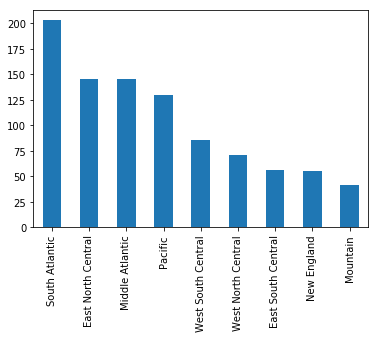

In [107]:
# create region counts series
region_counts = data_yes['US Region'].value_counts()
# visualize counts
region_counts.plot(kind='bar')